## Seaborn Versus Matplotlib

In [1]:
import matplotlib.pyplot as plt       
plt.style.use('classic')       
%matplotlib inline       
import numpy as np       
import pandas as pd 

In [2]:
# Create some data       
rng = np.random.RandomState(0)       
x = np.linspace(0, 10, 500)       
y = np.cumsum(rng.randn(500, 6), 0) 

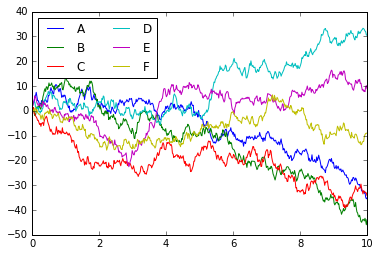

In [3]:
# Plot the data with Matplotlib defaults       
plt.plot(x, y)       
plt.legend('ABCDEF', ncol=2, loc='upper left');


In [2]:
import seaborn as sns       
sns.set() 

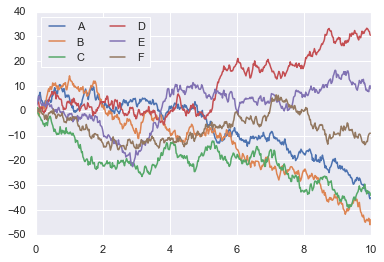

In [5]:
plt.plot(x, y)       
plt.legend('ABCDEF', ncol=2, loc='upper left');


###  Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib’s default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn’s set() method.

### Histograms , KDE , and Densities

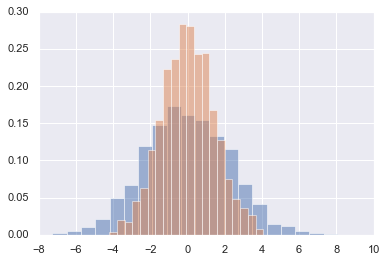

In [6]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)       
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':           
    plt.hist(data[col], density=True,bins = 20, alpha=0.5)


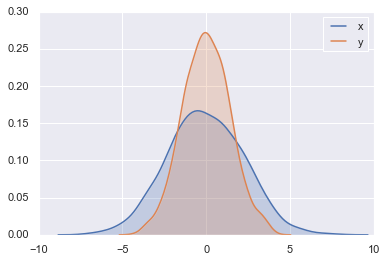

In [7]:
for col in 'xy':           
    sns.kdeplot(data[col], shade=True) # shade means color filling

    

kernel density estimation

### Histograms + KDE

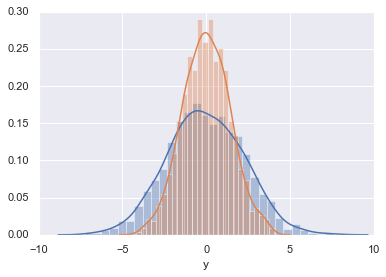

In [8]:
sns.distplot(data['x'])       
sns.distplot(data['y'])


## 2d plot

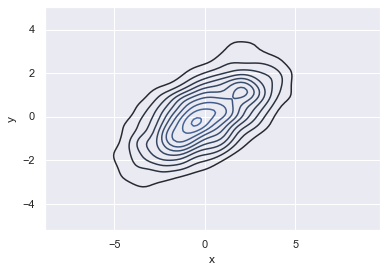

In [9]:
sns.kdeplot(data['x'] , data['y'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:693: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


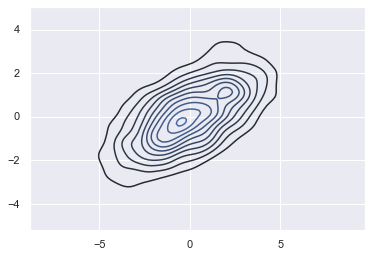

In [10]:
sns.kdeplot(data)

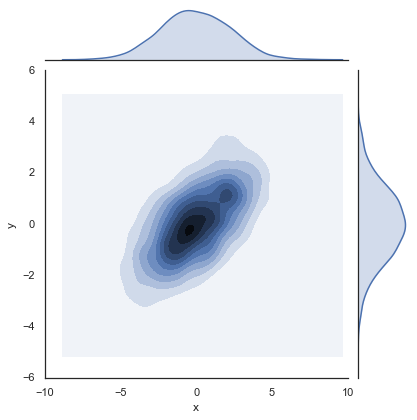

In [11]:
with sns.axes_style('white'):            
    sns.jointplot("x", "y", data, kind='kde')

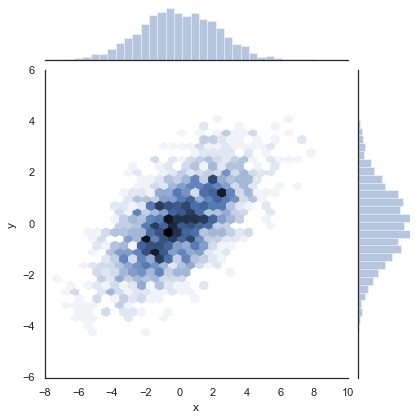

In [12]:
 with sns.axes_style('white'):            
        sns.jointplot("x", "y", data, kind='hex')


### Pair plots

In [13]:
iris = sns.load_dataset("iris")        
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


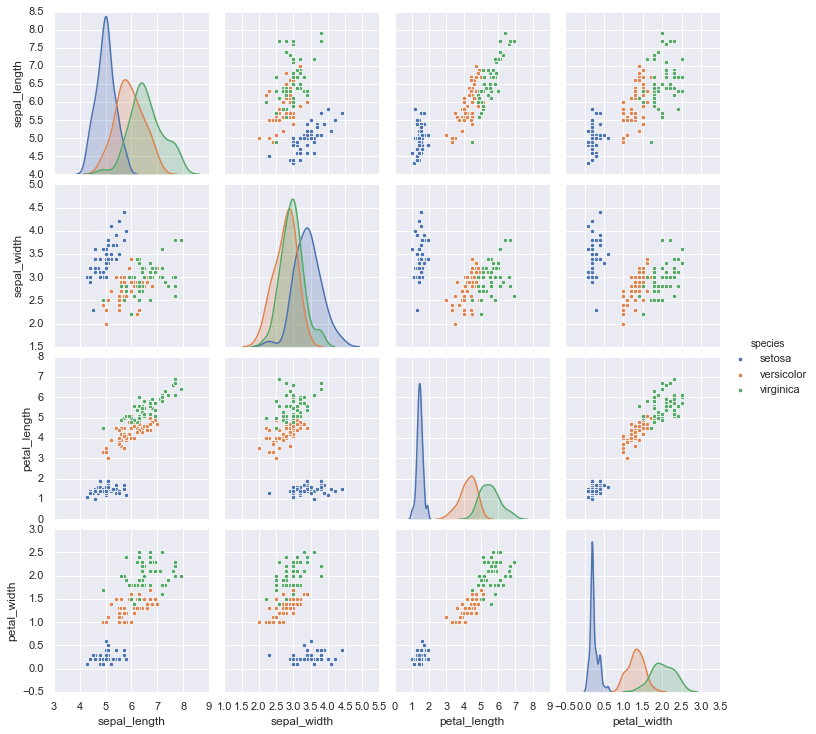

In [14]:
sns.pairplot(iris, hue='species', height=2.5)

## Faceted histograms

In [26]:
sns.get_dataset_names()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py:384: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [15]:
tips = sns.load_dataset('tips')        
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


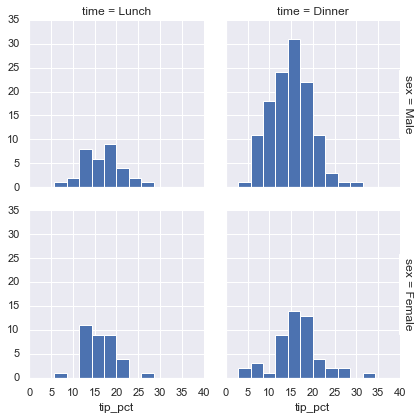

In [16]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)        
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15))

## Factor plots

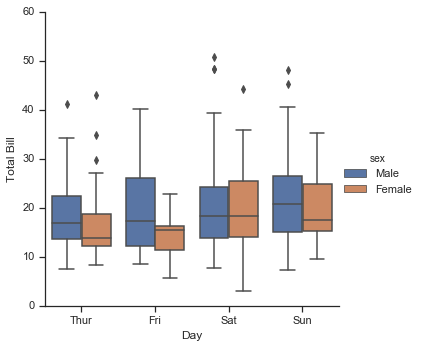

In [17]:
 with sns.axes_style(style='ticks'):            
        g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box")            
        g.set_axis_labels("Day", "Total Bill")

### Joint distributions

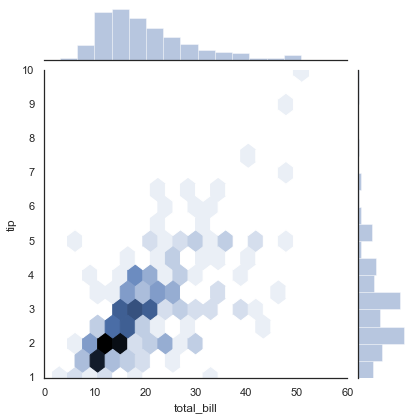

In [18]:
with sns.axes_style('white'):            
    sns.jointplot("total_bill", "tip", data=tips, kind='hex')


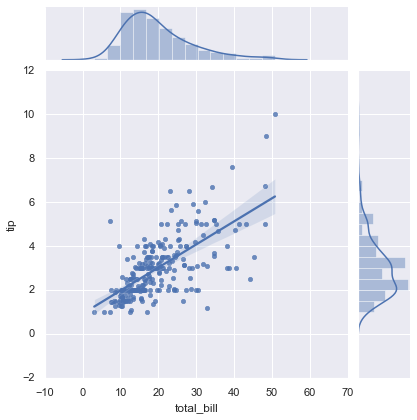

In [19]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg')

The joint plot can even do some automatic kernel density estimation and regression 

## Bar plots

In [25]:
planets = sns.load_dataset('planets')        
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


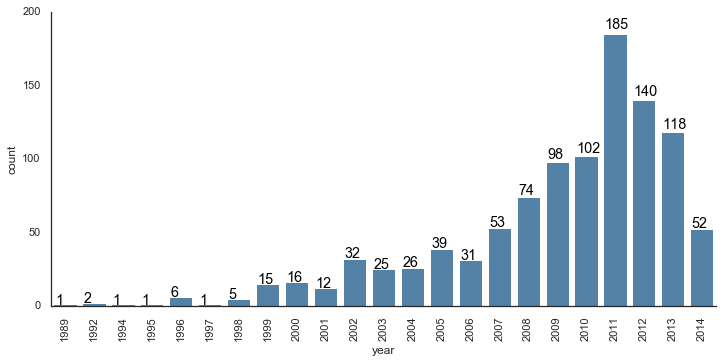

In [98]:
with sns.axes_style('white'):            
    g = sns.catplot("year", data=planets, aspect=2,                          
                       kind="count", color='steelblue')            
    g.set_xticklabels(rotation = 90)
    ax = g.facet_axis(0,0)
    for p in ax.patches:
        ax.text(p.get_x() + 0.05, 
            p.get_height() * 1.02, 
            '{0}'.format(p.get_height()), 
            color='black', 
            size='large')

In [99]:
s = pd.DataFrame({ "count" : planets['year'].value_counts()})
s.sort_index(inplace = True)
s['year'] = s.index
s.head()


,count,year
1989,1,1989
1992,2,1992
1994,1,1994
1995,1,1995
1996,6,1996


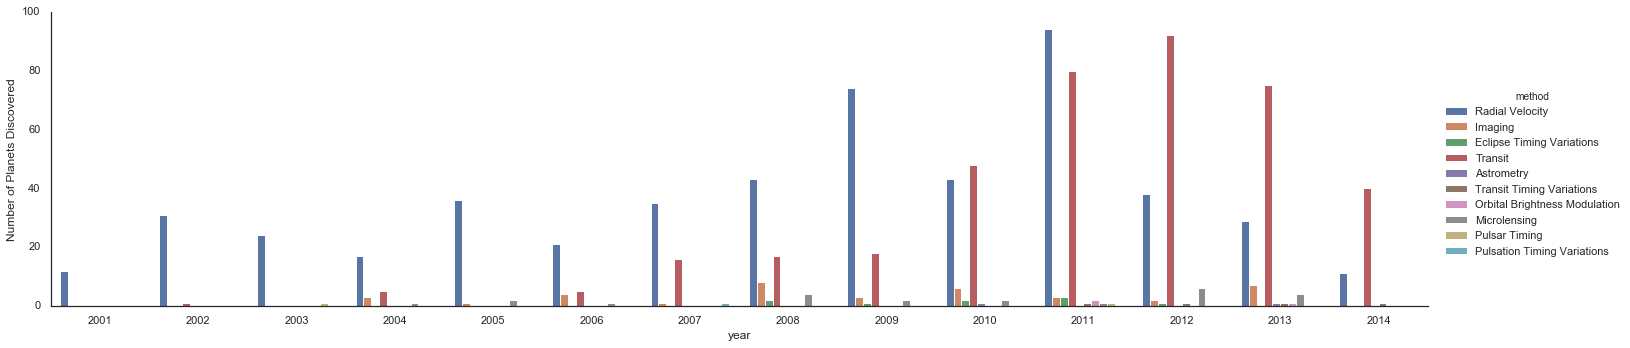

In [40]:
with sns.axes_style('white'):            
    g = sns.catplot("year", data=planets, aspect=4.0, kind='count',                               
                       hue='method', order=range(2001, 2015))            
    g.set_ylabels('Number of Planets Discovered')


## Example: Exploring Marathon Finishing Times

In [3]:
data = pd.read_csv('Data/marathon-data.csv')        
data.head()


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


split is time of completion of half round

In [4]:
data.columns

Index(['age', 'gender', 'split', 'final'], dtype='object')

In [5]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [6]:
pd.to_timedelta(data['split'])

0       01:05:38
1       01:06:26
2       01:06:49
3       01:06:16
4       01:06:32
          ...   
37245   04:24:24
37246   04:35:43
37247   04:22:35
37248   04:58:06
37249   04:59:49
Name: split, Length: 37250, dtype: timedelta64[ns]

In [7]:
data["split"]= pd.to_timedelta(data["split"])
data["final"]= pd.to_timedelta(data["final"]) 

In [8]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [9]:
data.isnull().any()

age       False
gender    False
split     False
final     False
dtype: bool

In [10]:
data.head()


,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [11]:
data['split_secs'] = data['split'].dt.total_seconds()
data['final_secs'] = data['final'].dt.total_seconds()

In [12]:
data.head()

,age,gender,split,final,split_secs,final_secs
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [13]:
data.dtypes

age                     int64
gender                 object
split         timedelta64[ns]
final         timedelta64[ns]
split_secs            float64
final_secs            float64
dtype: object

In [14]:
data.describe()

,age,split,final,split_secs,final_secs
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


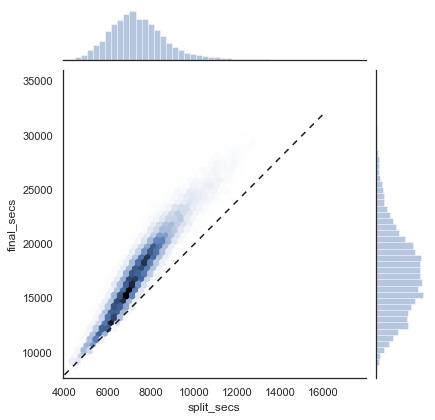

In [15]:
with sns.axes_style('white'):            
    g = sns.jointplot("split_secs", "final_secs", data, kind='hex') 
    g.ax_joint.plot([4000, 16000], [8000, 32000], '--k') 
    
# as split secs is seconds took to complete half round 
# middle line shows who finished second half with same time as first half.

### The dotted line shows where someone’s time would lie if they ran the marathon at a perfectly steady pace. 

### The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon. 

### If you have run competitively, you’ll know that those who do the opposite—run faster during the second half of the race—are said to have “negative-split” the race. 


#### Let’s create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race

In [16]:
data['split_frac'] = 1 - 2 * data['split_secs'] / data['final_secs']        
data.head()


,age,gender,split,final,split_secs,final_secs,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


In [17]:
# for 1st man

print(2*3938)
print(2*3938 / 7731)

# but he finished in 7731 -> negative split

7876
1.0187556590350537


In [18]:
# for 4th man

print(2*3976)
print(2*3976 / 8025)

# but he finished in 8025 -> positive split

7952
0.9909034267912773


In [19]:
data.shape

(37250, 7)

In [20]:
sum(data['split_frac'] < 0)

251

### out of 37250 only 251 have negative split 

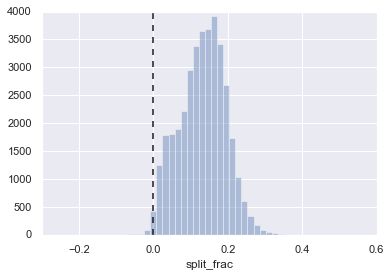

In [21]:
sns.distplot(data['split_frac'], kde=False)        
plt.axvline(0, color="k", linestyle="--")


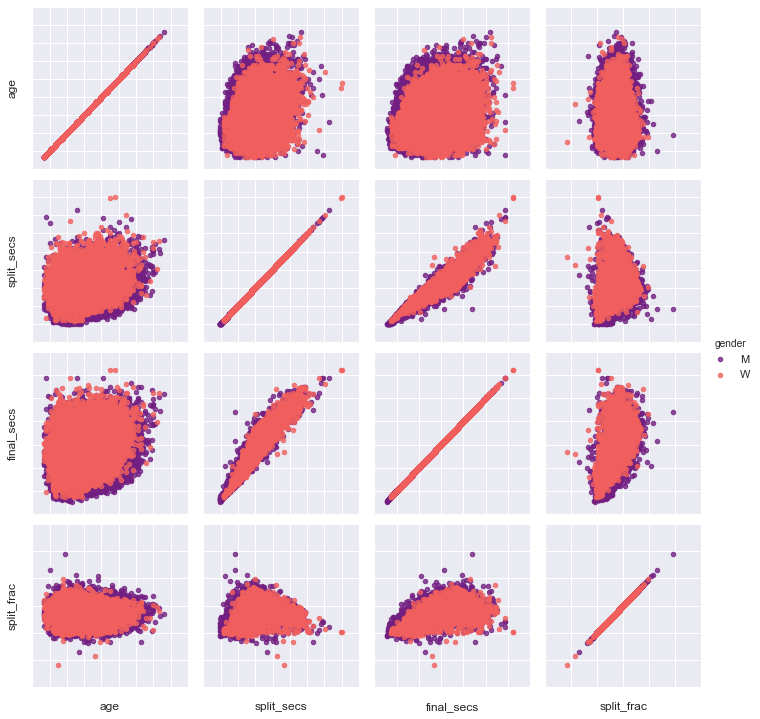

In [45]:
g = sns.PairGrid(data, vars=['age', 'split_secs', 'final_secs', 'split_frac'],                 
                 hue='gender', palette='magma') 
g.map(plt.scatter, alpha=0.8) 
g.set(xticklabels=[] , yticklabels = [])
g.add_legend()

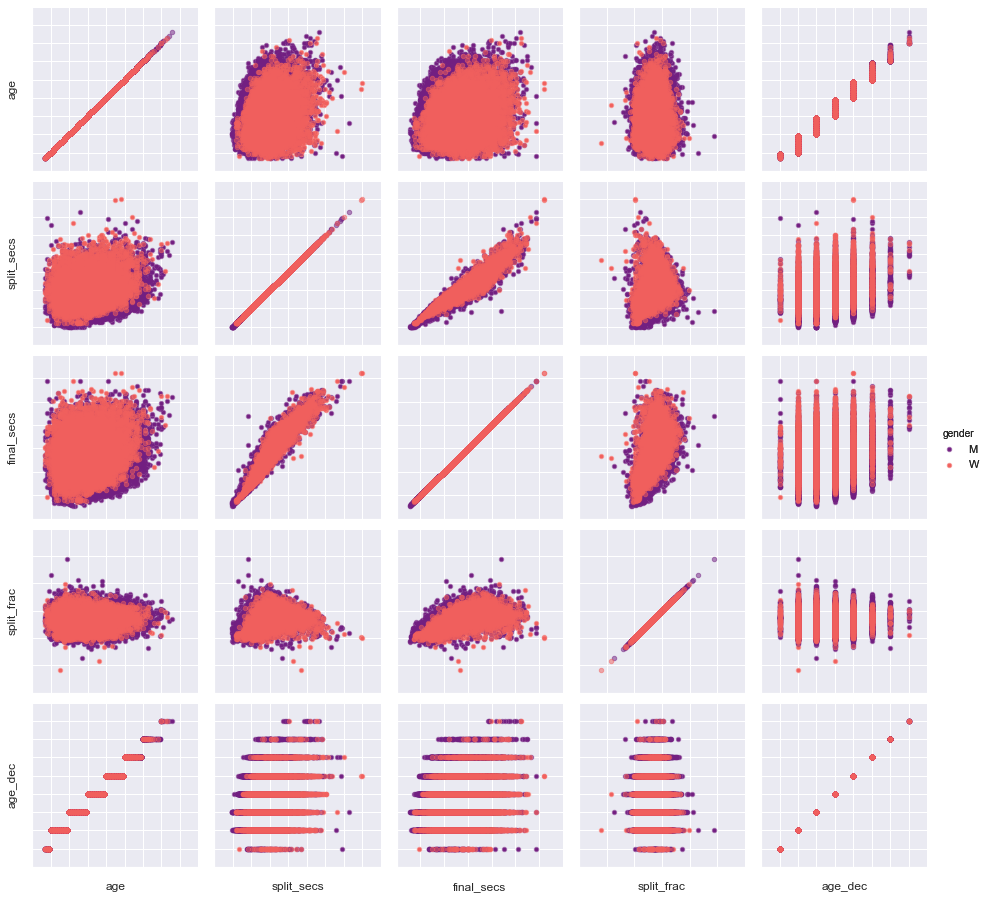

In [44]:
g = sns.pairplot(data, hue='gender', palette='magma' , diag_kind='scatter') 
g.map( plt.scatter , alpha = 0.5 )
g.set(xticklabels=[] , yticklabels = [])
g.add_legend()




### The difference between men and women here is interesting

Text(0.5, 0, 'split_frac')

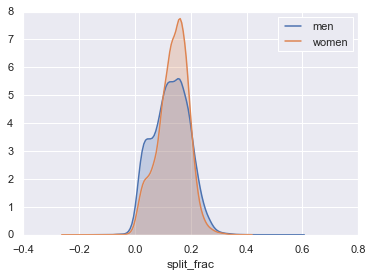

In [24]:
sns.kdeplot(data.split_frac[data.gender=='M'], label='men', shade=True)        
sns.kdeplot(data.split_frac[data.gender=='W'], label='women', shade=True)        
plt.xlabel('split_frac')

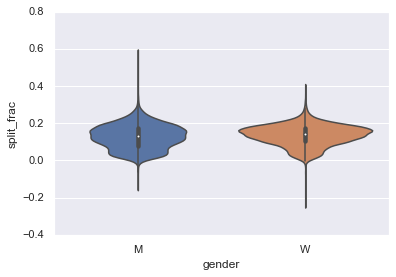

In [32]:
sns.violinplot("gender", "split_frac", data=data)

### The interesting thing here is that there are many more men than women who are running close to an even split!

In [26]:
### creating age decade

data['age_dec'] = data.age.map(lambda age: 10 * (age // 10)) 
data.head(10)


,age,gender,split,final,split_secs,final_secs,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30
5,31,M,01:06:13,02:14:11,3973.0,8051.0,0.013042,30
6,27,M,01:06:40,02:14:28,4000.0,8068.0,0.008428,20
7,31,M,01:06:31,02:15:16,3991.0,8116.0,0.016511,30
8,30,M,01:05:39,02:15:57,3939.0,8157.0,0.034204,30
9,30,M,01:05:40,02:16:39,3940.0,8199.0,0.038907,30


In [29]:
men = (data.gender == 'M') 
women = (data.gender == 'W')



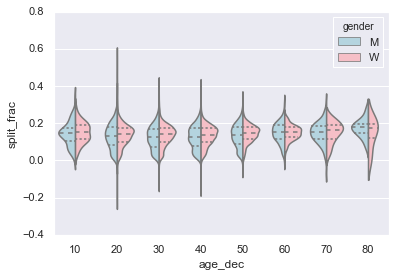

In [30]:
with sns.axes_style(style=None):    
    sns.violinplot("age_dec", "split_frac", hue="gender", data=data,                  
                   split=True, inner="quartile",                  
                   palette=["lightblue", "lightpink"])

*  Looking at this, we can see where the distributions of men and women differ:
*  the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

*  Also surprisingly, the 80-year-old women seem to outperform everyone in terms of their split time. 
*  This is probably due to the fact that we’re estimating the distribution from small numbers, as there are only a handful of runners in that range

In [33]:
sum(data.age >= 80)

15

## linear model , regression fit

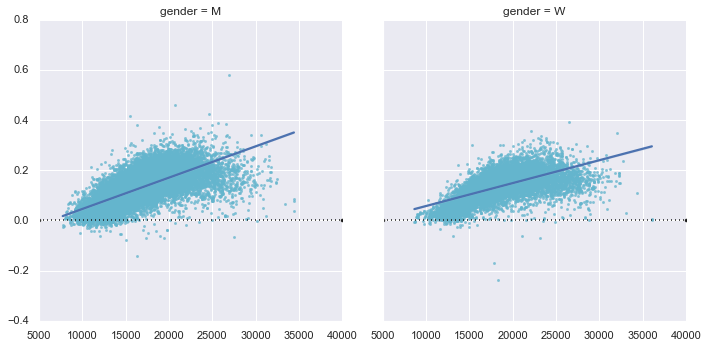

In [38]:
g = sns.lmplot('final_secs', 'split_frac', col='gender', data=data,                       
               markers=".", scatter_kws=dict(color='c'))        

g.map(plt.axhline, y=0, color="k", ls=":")

### Other Python Graphics Libraries

*  BOKEH
*  Plotly
*  Vispy
*  Vega and Vega Lite